<a href="https://colab.research.google.com/github/ritzz19/Zomato/blob/master/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data

In [0]:
import pandas as pd
data=pd.read_excel("zomato_train.xlsx")
data.head(5)

,url,address,name,online_order,book_table,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rates
0,https://www.zomato.com/bangalore/al-swaad-take...,"18, Masjid Street, Opp Akbari Masjid Neelasand...",Al Swaad Take Away,Yes,No,13,+91 7019942388\n+91 9902335220,Richmond Road,Quick Bites,NaN,"North Indian, South Indian, Arabian",350,"[('Rated 1.0', 'RATED\n If U need reasonable ...","['Beef Seekh Kabab', 'Beef BBQ Chops', 'Beef M...",Delivery,Residency Road,3.1
1,https://www.zomato.com/bangalore/the-boozy-gri...,"2nd Floor, 1st A Cross Road, Jyothi Nivas Coll...",The Boozy Griffin,No,Yes,5015,080 33512954,Koramangala 5th Block,"Casual Dining, Pub","Cocktails, Craft Beer, Salads, Devils Chicken,...","European, Continental","1,800","[('Rated 5.0', 'RATED\n Really great ambience...",[],Dine-out,Koramangala 6th Block,4.6
2,https://www.zomato.com/bangalore/barkat-btm-ba...,"28th, 8th Cross, Maruthi Nagar, Madiwala, BTM,...",Barkat,No,No,6,+91 9019670836,BTM,Quick Bites,NaN,Kerala,250,[],[],Dine-out,Koramangala 4th Block,3.4
3,https://www.zomato.com/bangalore/sriracha-lave...,"204, 2nd Level, 4th Floor, Comet Block, UB Cit...",Sriracha,No,No,699,+91 8041755366\n+91 7022422473,Lavelle Road,Casual Dining,"Noodles, Laksa, Cocktails, Dumplings, Sangria,...","Thai, Chinese, Indonesian, Asian, Momos","1,500","[('Rated 3.0', 'RATED\n Another restaurant in...",[],Dine-out,Residency Road,4.3
4,https://www.zomato.com/bangalore/sri-ganesh-ju...,"513, Opposite Ganesh Temple, Koramangala 8th B...",Sri Ganesh Juice Junction,Yes,No,129,+91 9845623889,Koramangala 8th Block,Beverage Shop,NaN,"Juices, Fast Food",150,"[('Rated 4.0', 'RATED\n Good cafe with most v...","['Dry Fruit Milkshake', 'Wheat Grass with Wate...",Delivery,Koramangala 6th Block,3.7


In [0]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rates'],
      dtype='object')

In [0]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [0]:
# As we can see we don't require these columns
data.drop(["url","address","phone",'listed_in(type)','listed_in(city)'],axis=1,inplace=True)

In [0]:
data.dropna(how="any",axis=0,inplace=True) #Dropping all null values

In [0]:
data.dtypes

name            object
online_order    object
book_table      object
votes            int64
location        object
rest_type       object
dish_liked      object
cuisines        object
average_cost    object
reviews_list    object
menu_item       object
rates           object
dtype: object

# Top 10 restaurants in Bangalore

In [0]:
data.name.value_counts().head(10)

Onesta                    62
Empire Restaurant         57
KFC                       47
Burger King               47
McDonald's                47
Faasos                    46
Smally's Resto Cafe       45
Domino's Pizza            44
Corner House Ice Cream    43
Pizza Hut                 43
Name: name, dtype: int64

Text(0.5, 1.0, 'Name vs Number of Restaurant')

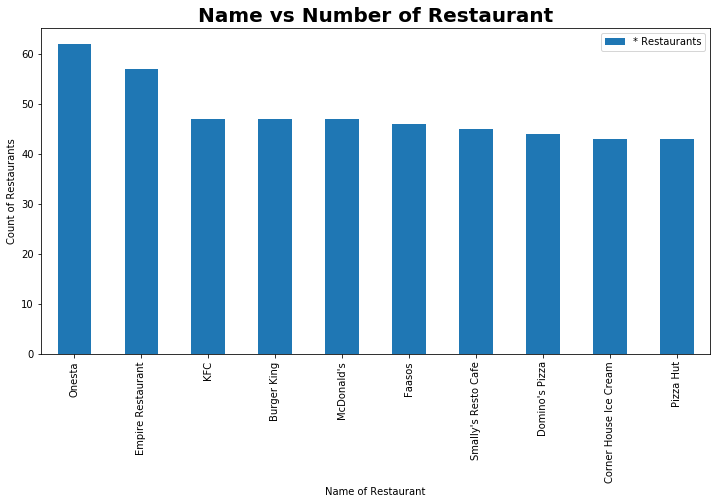

In [0]:
plt.figure(figsize = (12,6))
ax = data.name.value_counts()[:10].plot(kind = 'bar')
ax.legend(['* Restaurants'])
plt.xlabel("Name of Restaurant")
plt.ylabel("Count of Restaurants")
plt.title("Name vs Number of Restaurant",fontsize =20, weight = 'bold')

Conclusion: Cafe coffee day is most famous in Bangalore

# Online Orders

In [0]:
data.online_order.value_counts()

Yes    13083
No      5509
Name: online_order, dtype: int64

Text(0.5, 0, 'online orders')

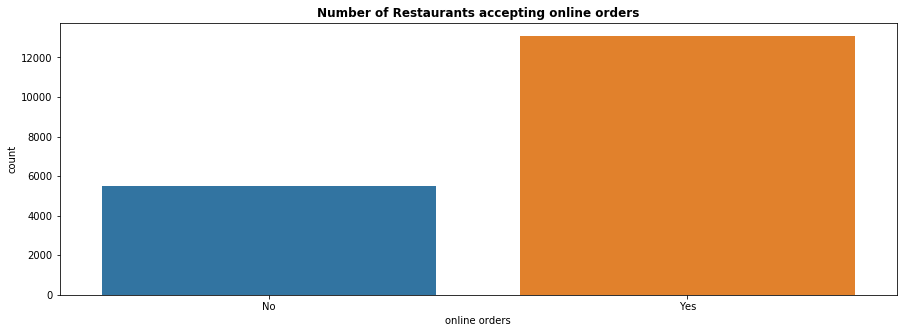

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
ax= sns.countplot(data['online_order'])
plt.title('Number of Restaurants accepting online orders', weight='bold')
plt.xlabel('online orders')

In [0]:
Rate_Status = pd.crosstab(index = data["online_order"],  # Make a crosstab
                              columns="rates",normalize=True)      # Name the count column

Rate_Status

col_0,rates
online_order,
No,0.29631
Yes,0.70369


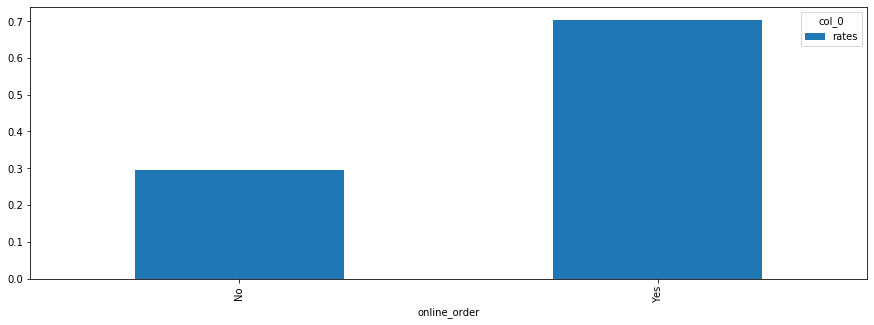

In [0]:
Rate_Status.plot.bar()

It's observed from above graph that restaurants which have online order has better rates.

# Book table

In [0]:
data.book_table.value_counts()

No     13755
Yes     4837
Name: book_table, dtype: int64

In [0]:
Rate_Status1 = pd.crosstab(index = data["book_table"],  # Make a crosstab
                              columns="rates",normalize=True)      # Name the count column

Rate_Status1

col_0,rates
book_table,
No,0.739834
Yes,0.260166


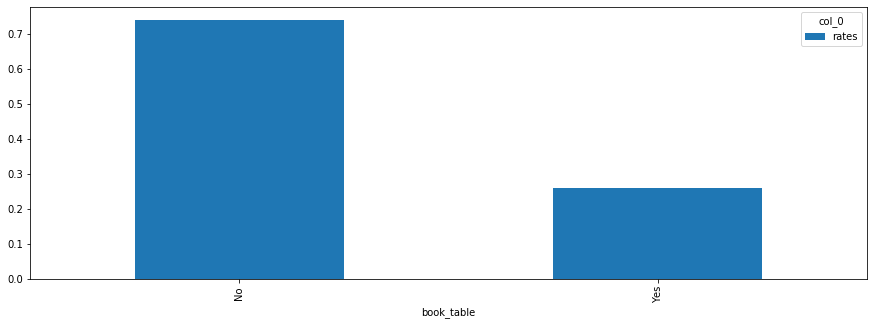

In [0]:
Rate_Status1.plot.bar()

It's observed from above graph that restaurants which have no booking table has better rates.

# Location

In [0]:
data.location.value_counts().head(10)

Koramangala 5th Block    1427
BTM                      1173
Indiranagar              1076
HSR                       913
Jayanagar                 846
JP Nagar                  806
Whitefield                656
Koramangala 6th Block     591
Koramangala 7th Block     583
Marathahalli              551
Name: location, dtype: int64

In [0]:
Rate_loc = pd.crosstab(index = data["location"],  # Make a crosstab
                              columns="rates",normalize=True)      # Name the count column

Rate_location=Rate_loc.head(10)

In [0]:
Rate_loc.head(10)

col_0,rates
location,
BTM,0.063092
Banashankari,0.016889
Banaswadi,0.008767
Bannerghatta Road,0.022537
Basavanagudi,0.012263
Basaveshwara Nagar,0.003012
Bellandur,0.020170
Bommanahalli,0.001130
Brigade Road,0.024043


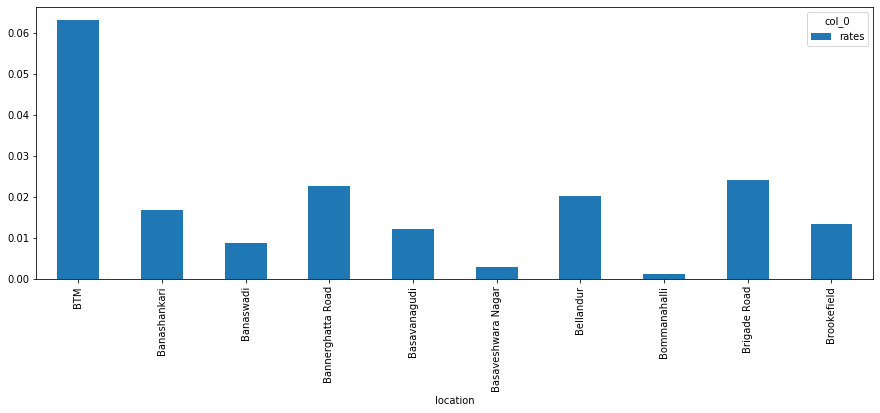

In [0]:
Rate_location.plot.bar()

1.It is observed BTM restaurants have more number of ratings


2.It can be observed though HSR has second most number of resaturants but it's ratings are not in top 10

# Restaurant Type

In [0]:
data['rest_type'].value_counts().head(10)

Casual Dining         5912
Quick Bites           4203
Cafe                  1874
Dessert Parlor         860
Casual Dining, Bar     773
Delivery               566
Bar                    293
Bar, Casual Dining     280
Takeaway, Delivery     269
Pub                    266
Name: rest_type, dtype: int64

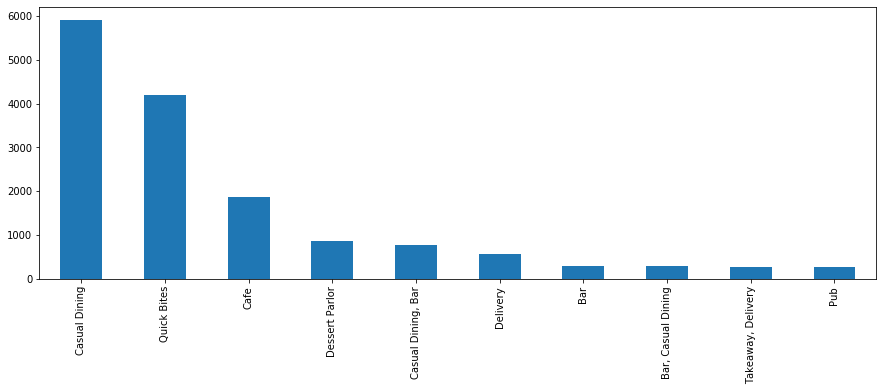

In [0]:
data['rest_type'].value_counts().head(10).plot.bar()

Casual dining type is most famous among bangaloreans

# Average cost

In [0]:
data['average_cost'].value_counts()[:10]

400      1961
500      1854
600      1744
300      1362
800      1316
1,000     969
700       965
1,200     719
200       687
1,500     683
Name: average_cost, dtype: int64

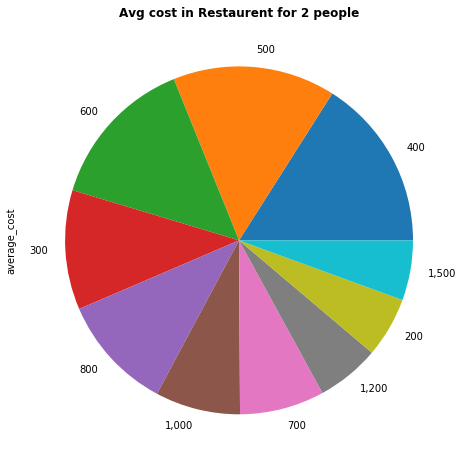

In [0]:
plt.figure(figsize = (12,8))
data['average_cost'].value_counts()[:10].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for 2 people', weight = 'bold')
plt.show()

Average cost is Rs 300

# Dish Liked

In [0]:
data.dish_liked=data.dish_liked.apply(lambda x:x.lower().strip())

In [0]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in data.dish_liked:
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

Text(0, 0.5, 'Count')

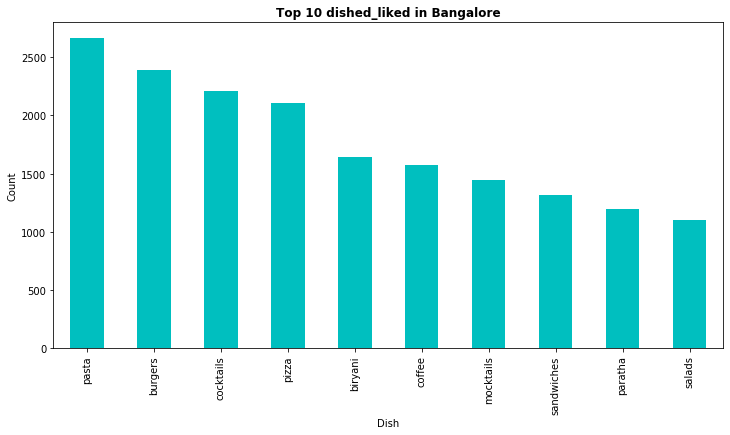

In [0]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar',color= 'c')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

It is observed pasta is loved by bangaloreans

# Rates

In [0]:
data['rates']=data['rates'].astype(float) #Converting strin to float type

In [0]:
data.rates.value_counts().head(10)

3.9    2605
4.0    2328
4.1    2255
3.8    1974
4.2    1702
4.3    1350
3.7    1307
4.4     920
3.6     698
4.5     509
Name: rates, dtype: int64

It is clearly observde that average rate is 3.9

# Cuisines

In [0]:
#lets delete the nulll values
#cuisines_data = data[data.cuisines.notnull()]
data.cuisines = data.cuisines.apply(lambda x:x.lower().strip())

In [0]:
cuisines_count= []

for i in data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

Text(0, 0.5, 'No of restaurants')

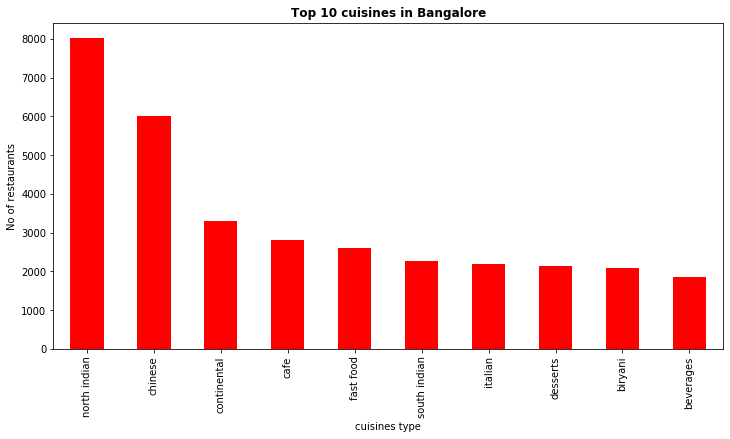

In [0]:
plt.figure(figsize=(12,6)) 
pd.Series(cuisines_count).value_counts()[:10].plot(kind='bar',color= 'r')
plt.title('Top 10 cuisines in Bangalore',weight='bold')
plt.xlabel('cuisines type')
plt.ylabel('No of restaurants')

Noth Indian cuisine is most loved by Bangaloreans

# Summary:
1.Cafe coffee day is most famous in Bangalore

2.Restaurants which have online order has better rates.

3.Restaurants which have no booking table has better rates.

4.It is observed BTM restaurants have more number of ratings


5.It can be observed though HSR has second most number of resaturants but it's ratings are not in top 10

6.Casual dining type is most famous among bangaloreans

7.Average cost is Rs 300

8.Pasta is loved by bangaloreans

9.Noth Indian cuisine is the most loved by Bangaloreans

# MODELLING PROCESS

In [0]:
data.dtypes

name             object
online_order     object
book_table       object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
average_cost     object
reviews_list     object
menu_item        object
rates           float64
dtype: object

In [0]:
from sklearn.preprocessing import LabelEncoder #Label encoding
T = LabelEncoder()                 
data['location'] = T.fit_transform(data['location'])
data['rest_type'] = T.fit_transform(data['rest_type'])
data['cuisines'] = T.fit_transform(data['cuisines'])
data['dish_liked'] = T.fit_transform(data['dish_liked'])
data['online_order'] = T.fit_transform(data['online_order'])
data['book_table']= T.fit_transform(data['book_table'])

In [0]:
data["average_cost"] = data["average_cost"].str.replace(',' , '')  #converting strin to float
data["average_cost"] = data["average_cost"].astype('float')

In [0]:
data.dtypes

name             object
online_order      int64
book_table        int64
votes             int64
location          int64
rest_type         int64
dish_liked        int64
cuisines          int64
average_cost    float64
reviews_list     object
menu_item        object
rates           float64
dtype: object

In [0]:
data.drop(columns=['reviews_list','menu_item'], inplace  =True) #Deletin the columns

In [0]:
data.dtypes

name             object
online_order      int64
book_table        int64
votes             int64
location          int64
rest_type         int64
dish_liked        int64
cuisines          int64
average_cost    float64
rates           float64
dtype: object

# Splitting data

In [0]:
X = data.drop(['rates','name'],axis = 1)
y = data['rates']

In [0]:
#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])
data.head(5)

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,average_cost,rates
1,The Boozy Griffin,-1.541052,1.686329,3.945124,0.281036,-0.338625,-0.720954,-0.129784,2.011102,1.626822
3,Sriracha,-1.541052,-0.593004,0.083064,0.539061,-0.631055,0.444937,1.671811,1.435326,0.922851
7,Chez Nous - Novotel,-1.541052,1.686329,-0.430565,0.754083,0.636141,-0.614901,-0.123350,3.354578,-0.015777
8,Maxpresso,-1.541052,-0.593004,-0.252495,0.367044,-0.972223,-1.347507,-1.103503,-0.100075,0.453537
9,Hyderabadi Biryani Hub,0.648907,-0.593004,-0.347347,-1.525143,-0.631055,-1.465422,-1.223609,-0.292000,-0.719748


In [0]:
from sklearn.model_selection import train_test_split
seed = 10
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=seed, test_size=.2)

In [0]:
print(X.shape)
print(y.shape)

(18592, 8)
(18592,)


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#1.Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
lr.score(X_test,y_test)*100

21.810423629182097

In [0]:
#2.Random forest
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test,y_test)*100

89.85475921514093

In [0]:
#3.KNN
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_jobs=-1)
knn.fit(X_train,y_train)
Y_knn_pred=knn.predict(X_test)
knn.score(X_train,y_train)*100

83.3496388961181

In [0]:
#4.SVR
from sklearn.svm import LinearSVR
svr=LinearSVR(random_state=42)
svr.fit(X_train,y_train)
Y_svr_pred=svr.predict(X_test)
svr.score(X_train,y_train)*100

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-50.89289292499324

In [0]:
#5.Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
gbr=HistGradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)
Y_gbr_pred=gbr.predict(X_test)
gbr.score(X_train,y_train)*100

70.56779924903122

It is observed Random forest has better score therefore using random forest for predicting value

In [0]:
Randpred = pd.DataFrame({ "actual": y_test, "pred": y_pred_rfr })
Randpred

,actual,pred
3678,1.392165,1.366353
33191,0.453537,0.438989
16791,1.861479,1.833321
17677,-0.954405,-0.974351
30596,-0.015777,0.038194
...,...,...
8956,-0.719748,-0.719748
1322,-0.015777,0.076209
5877,-0.250434,-0.250434
22478,-0.250434,-0.269206
